# Customer Lifetime Value Analytics

Customer lifetime value (CLTV) is the estimated total amount a customer will spend on a business throughout their relationship with that business. It takes into account the revenue generated by the customer as well as the costs associated with acquiring and serving that customer. By analyzing the relationship between customer acquisition costs and revenue generated, we can determine which channels are the most cost-effective for acquiring and retaining high-value customers.

In [11]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
pio.templates.default = "plotly_white"

In [12]:
cl=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\customer_acquisition_data.csv')
cl


,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [13]:
cl.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [14]:
#check for the null values
cl.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [15]:
#information about the data
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [16]:
cl['channel'].unique()

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [17]:
cl.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


#### isualizing the distribution of acquisition cost and revenue generated by the customer using histograms

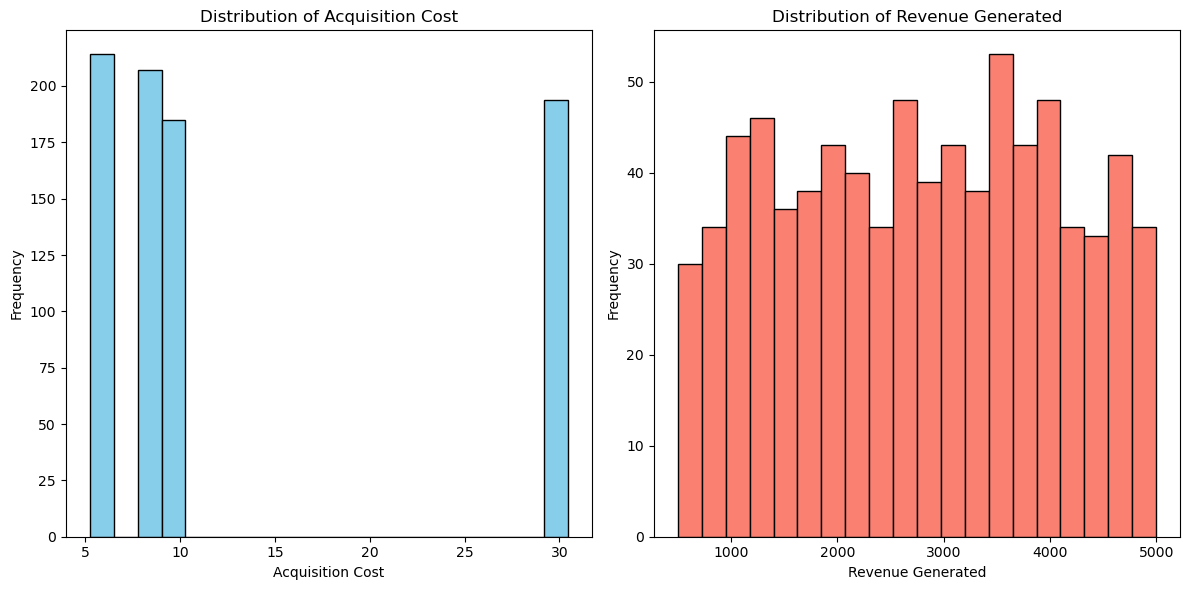

In [18]:
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
cl = pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\customer_acquisition_data.csv')

# Plot histograms for acquisition cost and revenue generated
plt.figure(figsize=(12, 6))

# Plot histogram for acquisition cost
plt.subplot(1, 2, 1)
plt.hist(cl['cost'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Acquisition Cost')
plt.xlabel('Acquisition Cost')
plt.ylabel('Frequency')

# Plot histogram for revenue generated
plt.subplot(1, 2, 2)
plt.hist(cl['revenue'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Distribution of Acquisition Cost:

.This histogram displays the distribution of acquisition costs associated with acquiring customers. Acquisition cost refers to the expenses incurred to attract and acquire new customers.

.The x-axis represents the acquisition cost values, and the y-axis represents the frequency of each acquisition cost value.

.The histogram is divided into bins , and each bar represents the number of customers falling into that range of acquisition cost.





##### Distribution of Revenue Generated:

.This histogram displays the distribution of revenue generated by customers. Revenue generated represents the income or earnings generated from customers through purchases or transactions.

.Similar to the acquisition cost histogram, the x-axis represents the revenue generated values, and the y-axis represents the frequency.

.The histogram is also divided into bins  and each bar represents the number of customers falling into that range of revenue generated.


## compare the cost of acquisition across different channels and identify the most and least profitable channels

In [31]:
average_acquisition_cost = cl.groupby('channel')['cost'].mean().reset_index()


average_acquisition_cost = average_acquisition_cost.sort_values(by='cost', ascending=False)



average_acquisition_cost

,channel,cost
1,paid advertising,30.450327
3,social media,9.546326
2,referral,8.320327
0,email marketing,5.246263


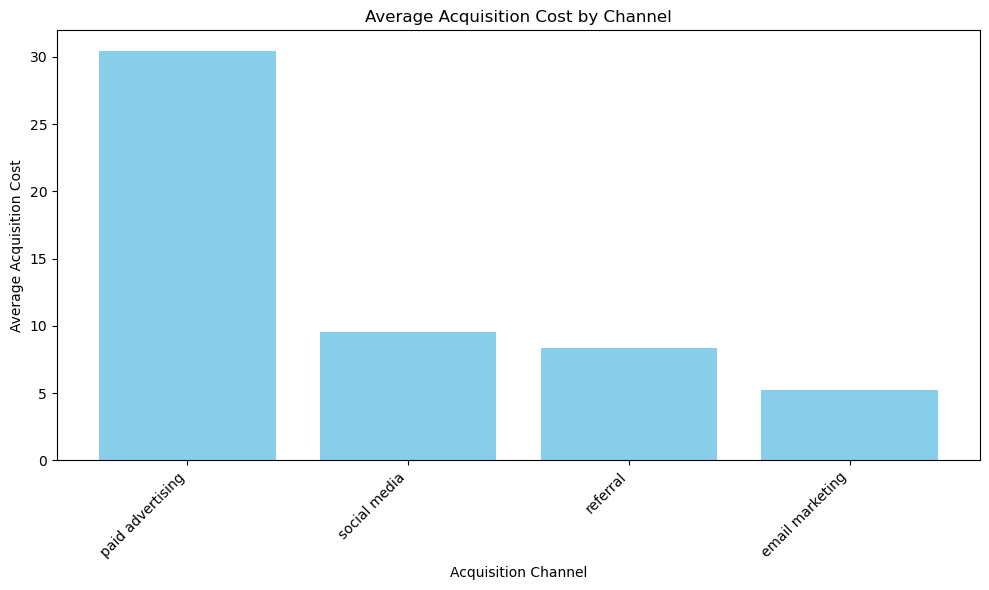

In [28]:
average_acquisition_cost = cl.groupby('channel')['cost'].mean().reset_index()

average_acquisition_cost = average_acquisition_cost.sort_values(by='cost', ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(average_acquisition_cost['channel'], average_acquisition_cost['cost'], color='skyblue')
plt.xlabel('Acquisition Channel')
plt.ylabel('Average Acquisition Cost')
plt.title('Average Acquisition Cost by Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### which channels are most and least effective at converting customers

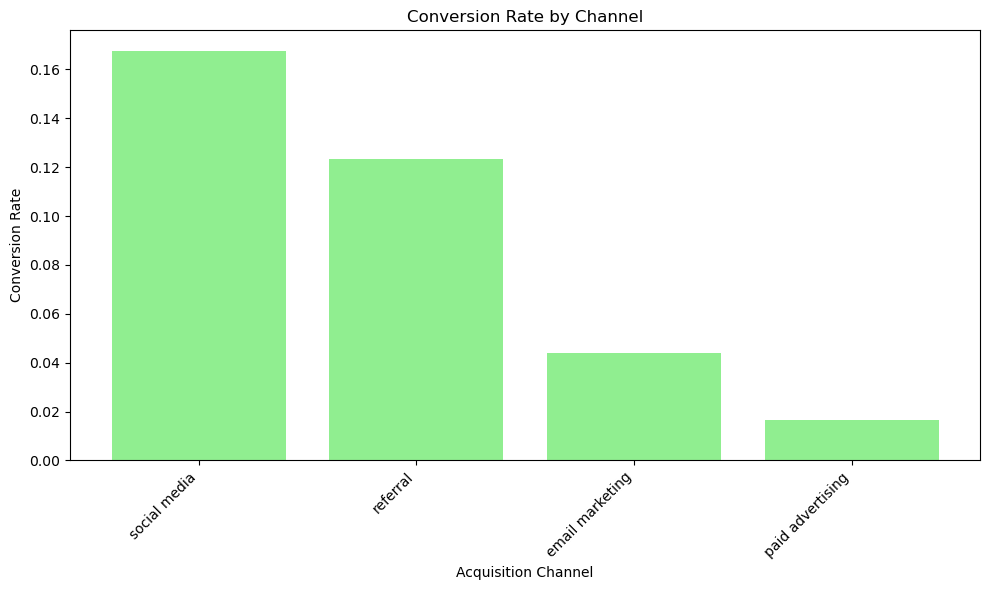

In [29]:
conversion_rates = cl.groupby('channel')['conversion_rate'].mean().reset_index()


conversion_rates = conversion_rates.sort_values(by='conversion_rate', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(conversion_rates['channel'], conversion_rates['conversion_rate'], color='lightgreen')
plt.xlabel('Acquisition Channel')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

social media is highest conversion rate of channel

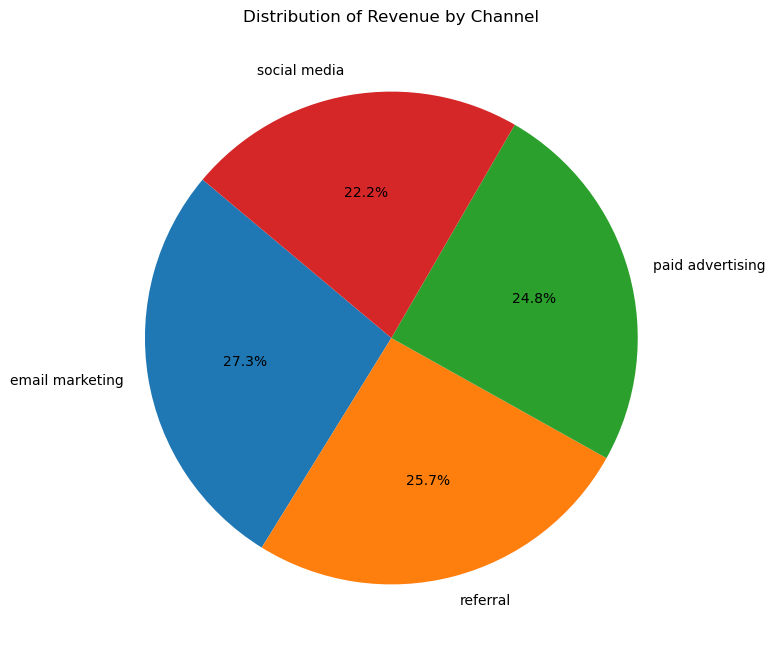

In [32]:
revenue_by_channel = cl.groupby('channel')['revenue'].sum().reset_index()


revenue_by_channel = revenue_by_channel.sort_values(by='revenue', ascending=False)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Revenue by Channel')

plt.show()

email marketing is the most profitable channel in terms of generating revenue. But there’s not a huge difference between the percentages of revenue generation from all the channels to call any channel the least profitable channel.

##### calculate the customer lifetime value from each channel. Based on the data we have, we can use the formula mentioned below to calculate CLTV:

In [35]:
cl['cltv'] = (cl['revenue'] - cl['cost']) * cl['conversion_rate'] / cl['cost']

channel_cltv = cl.groupby('channel')['cltv'].mean().reset_index()

fig = px.bar(channel_cltv, x='channel', y='cltv', color='channel',
             title='Customer Lifetime Value by Channel')


fig.update_yaxes(title='CLTV')

fig.show()